In [17]:
import os
import sys
import math
import random
import itertools
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
import networkx as nx


from qiskit import QuantumCircuit, Aer, execute, assemble, IBMQ, BasicAer
from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info import Operator
from qiskit.circuit.library import XGate
from qiskit.visualization import plot_histogram, plot_state_city

from qiskit_textbook.tools import array_to_latex

In [18]:
path = os.getcwd()
print(path)

/home/rkrd/Documents/Python/Quantum Lab Codes


In [19]:
print('Enter the count')
counter=int(input())

Enter the count
1


A generating set $\Omega\subset\mathbb{Z}_2^n$ is a set that generates $\mathbb{Z}_2^n$. So, the generating set is of size at least $n$. Clearly, size can not be greater than $2^n-1$.

In [20]:
print('Enter the dimension of the Cubelike graph.')
n = int(input())
print('Minimum degree allowed: ',n,'\nMaximum degree allowed: ',2**n-1)

while True:
    print('Enter the size of the generating set.')
    d = int(input())
    if d<n or d>2**n-1:
        if d<n:
            print('The size is too small for the graph to be connected')
        elif d>2**n-1:
            print('The size is too high for the graph to be constructed')
        print('Do you want to enter the size of the generating set again?')
        option = input()
        if option == 'y' or option == 'Y':
            continue
        else:
            raise Exception('Integers below n and above 2^n not allowed')
    else:
        break        


Enter the dimension of the Cubelike graph.
2
Minimum degree allowed:  2 
Maximum degree allowed:  3
Enter the size of the generating set.
2


In [21]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   N = 2**n ### number of vertices in the graph
m = math.ceil(math.log(d,2)) ### number of qubits required
Vertex_set = [v for v in range(N)]
Gen_set = [2**i for i in range(n)]  ###at least n linearly independent sets required to generate the group
# print('Vertex set: ', Vertex_set, '\nInitialized Generating set: ',Gen_set)

In [22]:
if n<d:
    if d == 2*n-1:
        print('Do you want to generate Augmented cube')
        option = input()
        if option == 'y' or option == 'Y':
            for x in range(1,n):
                vertex = 1
                for y in range(1,x+1):
                    vertex = vertex^(2**y)
                Gen_set += [vertex]
        else:
            print('Do you want to enter the remaining elements in the generating set')
            option = 'n' #input()
            if option == 'y' or option == 'Y':
                print('Please enter the remaining integers (>0 and <=',N-1,').')
                Gen_set += [int(input()) for count in range(d-n)]
            else:
                Remained_vertex = list(set(Vertex_set) - set(Gen_set)) ###standard basis removed to select from rest
                Remained_vertex.remove(0)
                Add_gen_vertex = random.sample(Remained_vertex, d-n)
                Gen_set += Add_gen_vertex

    else:
        print('Do you want to enter the remaining elements in the generating set')
        option = 'n' #input()
        if option == 'y' or option == 'Y':
            print('Please enter the remaining integers (>0 and <=',N-1,').')
            Gen_set += [int(input()) for count in range(d-n)]
        else:
            Remained_vertex = list(set(Vertex_set) - set(Gen_set)) ###standard basis removed to select from rest
            Remained_vertex.remove(0)
            Add_gen_vertex = random.sample(Remained_vertex, d-n)
            Gen_set += Add_gen_vertex

print('Generating set: ', [bin(x)[2:].zfill(n) for x in Gen_set])

Generating set:  ['01', '10']


In [23]:
###Propose vertex that gets hit = sum of elements of Generating set
sum = 0
for x in Gen_set:
    sum = sum^int(bin(x),2)
print(sum)
target_node=bin(sum)[2:]
print(target_node)

3
11


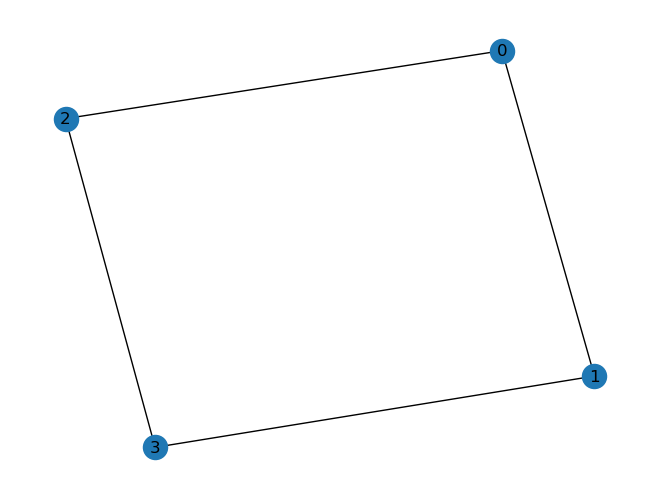

In [24]:
G = nx.Graph()
for edge in itertools.product(range(N),range(N)):
    value = edge[0]^edge[1]
    if value in Gen_set:
        G.add_edge(edge[0], edge[1])
nx.draw(G, with_labels = True)
# plt.show()
plt.savefig(path+'/Figures/'+str(counter)+'_dim_'+str(n)+'_deg_'+str(d)+'_targ_'+target_node+'.eps', format='eps')

Do you want to construct matrix for Grover operator (y/n)


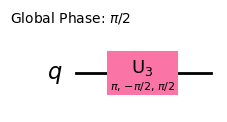

In [44]:
print('Do you want to construct matrix for Grover operator (y/n)')
ans = 'y'
if ans == 'y' or ans == 'Y':
    Grover_op = (2/d)*ones(d)-eye(d)
    
    for increment in range(d, 2**m):
        Grover_op = Grover_op.col_insert(increment, Matrix([0 for i in range(increment)]))
        Grover_op = Grover_op.row_insert(increment, Matrix([[0 for i in range(increment)]+[-1]]))
    Grover = QuantumCircuit(m, name = 'Grover')
    Grover.append(Operator(np.matrix(Grover_op)),range(m))
elif m>1:
    Grover = QuantumCircuit(m, name = 'Grover')
    Grover.h(range(m))
    Grover.x(range(m))
    Grover.barrier()
    Grover.h(m-1)
    Grover.append(XGate().control(m-1),[i for i in range(m)])
    Grover.h(m-1)
    Grover.barrier()
    Grover.x(range(m))
    Grover.h(range(m))
elif m==1:
    Grover = QuantumCircuit(1, name = 'Grover')
    Grover.h(0)
    Grover.x(0)
    Grover.z(0)
    Grover.x(0)
    Grover.h(0)

Grover = Grover.decompose()
Grover.draw('mpl')

In [10]:
# backend = Aer.get_backend('unitary_simulator')
# job = execute(Grover, backend)
# result = job.result()
# unitary = result.get_unitary()
# array_to_latex(unitary)

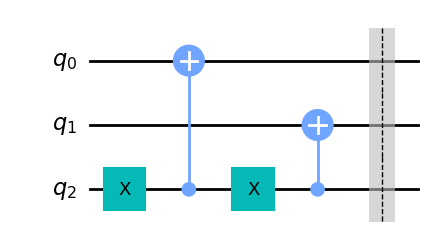

In [37]:
### we will move from 000 towards 111, instead reverse
Shift_op = QuantumCircuit(n+m, name = 'Shift')
control_qubits = [n+m-1-i for i in range(m)]
state_qubits = [n-1-i for i in range(n)]
coin_qubits = [m-1-i for i in range(m)]

balance_X = [0]*m
for i in range(d): ###Gen_set, labelling done from 0 to d-1 
    edge_label = Gen_set[i]
    target_qubits = [int(x) for x in str(bin(edge_label)[2:].zfill(n))] ###vertex qubits 
    control_X = [int(x) for x in str(bin(i)[2:].zfill(m))]  ###shifts for 1
    #print(i,'\t',edge_label,'\t',control_X,'\t',target_qubits)
    
    for x in coin_qubits:
        Shift_op.x(n+m-1-x)
        balance_X[x] = balance_X[x]^1
        #print(x,':\tbalanced X:',balance_X)
        if control_X[x] == 1:
            break
    for target in state_qubits:
        if target_qubits[target] == 1:
            Shift_op.append(XGate().control(m), control_qubits + [n-1-target])
    
Shift_op.barrier()
for balance in coin_qubits:
    if balance_X[balance] == 1:
        Shift_op.x(n+m-1-balance)

Shift_op.draw('mpl')

Enter the number of steps
2


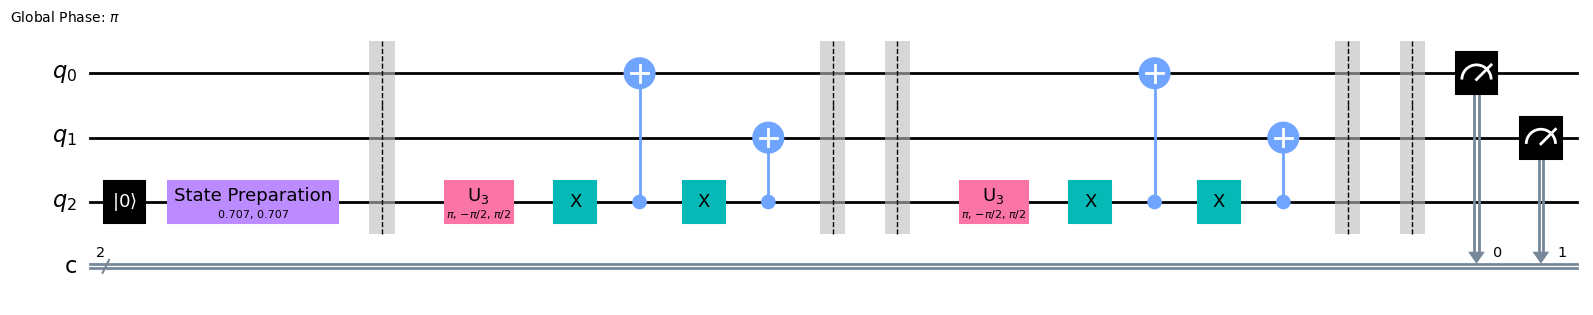

In [40]:
qc = QuantumCircuit(n+m,n)

print('Enter the number of steps')
steps = int(input())

if ans == 'y' or ans == 'Y':
    initial_vector = [1/math.sqrt(d)]*d + [0]*(2**m-d)
    qc.initialize(initial_vector, range(n,n+m))
else:
    qc.h(range(n,n+m))

qc.barrier()

for step in range(steps):
    if ans == 'y' or ans == 'Y':
        pass
    else:
        pass
    qc.append(Grover, range(n,n+m))
    qc.append(Shift_op,range(n+m))
    qc.barrier()



for i in range(n):
    qc.measure(i,i)

qc = qc.decompose()
qc.draw('mpl')


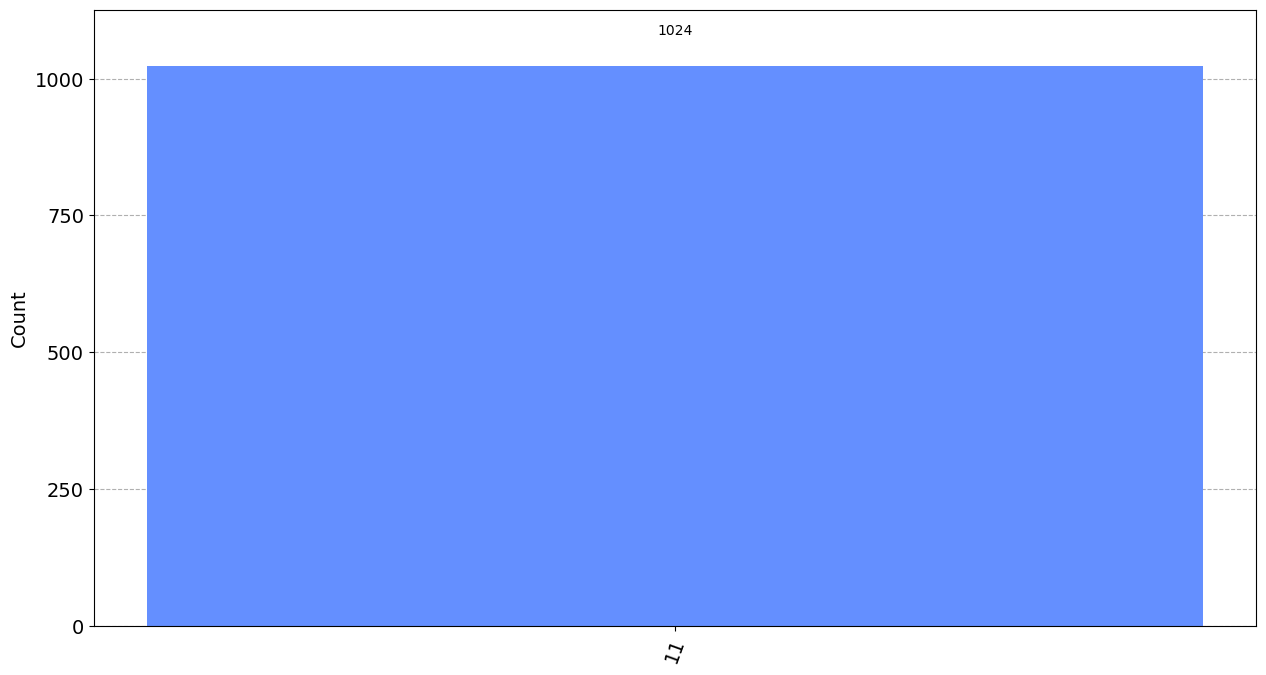

In [14]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()
counts = result.get_counts()
#plot_histogram(counts)
count={}
for x in counts:
    y=int(x,2)
    count[y]=counts[x]
#print(count)
plot_histogram(counts,figsize=(15,8))

In [14]:
# count={}
# for x in counts:
#     y=int(x,2)
#     count[y]=counts[x]/1024
# plt.bar(list(count.keys()),list(count.values()))
# plt.show()
# backend = Aer.get_backend('statevector_simulator') # the device to run on
# result = execute(qc, backend).result()
# psi  = result.get_statevector(qc)
# plot_state_city(psi)

In [15]:
plot_histogram(counts, figsize=(15,8), title='step'+str(steps)).savefig(path+'/Figures/'+str(counter)+'_dim_'+str(n)+'_deg_'+str(d)+'_step_'+str(steps)+'.eps')

In [16]:
# filename = 'deg_2^n-1'
# filename2 = 'T_vs_deg_2^n-1'
# texfile = 'tex_deg_2^n-1'
# outfile=open(path+'/Figures/T_vs_n+k/'+filename+'.txt','a')
# outfile2=open(path+'/Figures/T_vs_n+k/'+filename2+'.txt','a')
# outfile3=open(path+'/Figures/T_vs_n+k/'+texfile+'.txt','a')
# outfile.write(str(counter)+':\t dim = '+str(n)+'\t deg = '+str(d)+'\n')
# outfile2.write(str(n)+' '+str(d)+' '+str(steps)+'\n')
# GenSet = [bin(x)[2:].zfill(n) for x in Gen_set]
# outfile.write('Gen set= '+str(GenSet)+'\n')
# outfile.write('Gen set= '+str(Gen_set)+'\n')
# max_prob = max(list(counts.values()))
# outfile.write('Target= '+str(int(target_node,2))+'='+str(target_node)+'\t steps= '+str(steps) +'\t prob= '+str(max_prob/1024))
# outfile.write('\n\n')
# outfile3.write(str(n)+' & '+str(d)+' & '+'\{'+str(Gen_set).strip('[]')+'\}'+' & '+str(int(target_node,2))+' & '+str(steps)+' & '+str(round(max_prob/1024,3))+' \\\\ \n'+'\hline\n')
# outfile.close()
# outfile2.close()
# outfile3.close()

In [17]:
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub = 'ibm-q')
# for backend in provider.backends():
#     print(backend)
# print('Enter computer name')
# computer = input()
# backend = provider.get_backend(computer)

In [18]:
# job = execute(qc, backend)
# job_monitor(job)
# result = job.result()
# counts = result.get_counts()
# count={}
# for x in counts:
#     y=int(x,2)
#     count[y]=counts[x]
# plot_histogram(count,figsize=(30,10))

In [19]:
print('Enter filename')
#filename = input()
# plot_histogram(counts, title = 'step'+str(steps)).savefig(path+'/Figures/'+computer+'_cube_'+str(n)+'_deg_'+str(d)+'_step_'+str(steps)+'.eps')

Enter filename


In [20]:
# print('Enter the maximum number of evolutions')
# max_step = int(input())
# print('Enter the filename')
# filename = 'hypercube' #input()
# pst_time = 0

# out_file = open(path+'/TextFiles/'+filename + '.txt','a')
# out_file.write(filename + ' graph: dim= '+str(n)+', degree= '+str(d)+'\n')
# out_file.write('Generating set: '+str(Gen_set)+'\n')

# T_p ={}
# for steps in [i for i in range(1,max_step)]:
#     qc = QuantumCircuit(n+m,n)
#     if ans == 'y' or ans == 'Y':
#         initial_vector = [1/math.sqrt(d)]*d + [0]*(2**m-d)
#         qc.initialize(initial_vector, range(n,n+m))
#     else:
#         qc.h(range(n,n+m))

#     qc.barrier()

#     for step in range(steps):
#         if ans == 'y' or ans == 'Y':
#             pass
#         else:
#             pass
#         qc.append(Grover, range(n,n+m))
#         qc.barrier()
#         qc.append(Shift_op,range(n+m))
#     qc.barrier()

    
#     for i in range(n):
#         qc.measure(i,i)
    
#     backend = Aer.get_backend('qasm_simulator')
#     job = execute(qc, backend)
#     result = job.result()
#     counts = result.get_counts()
#     zero = bin(0)[2:].zfill(n)
#     if zero in counts and counts[zero]>900:
#         print(zero,':\t',steps,': ',counts[zero]/1024)
#         out_file.write(zero+' -> T= '+str(steps)+': p= '+str(counts[zero]/1024)+'\n')
#     for x in counts:
#         if counts[x]>900 and x!=zero:
#             print(x,':\t',steps,': ',counts[x]/1024)
#             out_file.write(x+' -> T= '+str(steps)+': p= '+str(counts[x]/1024)+'\n')
#         if counts[x]>=999:
#             pst_time = steps
#             pst = counts

# out_file.write('\n\n')
# out_file.close()

In [21]:
print('done with cubelike graph of dimension ',n)

done with cubelike graph of dimension  2
